In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow_datasets as tfds

import numpy as np
import os
import PIL
import PIL.Image
import glob

import cv2

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


2022-09-21 18:29:52.832800: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-21 18:29:52.832824: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mike-System-Product-Name
2022-09-21 18:29:52.832827: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mike-System-Product-Name
2022-09-21 18:29:52.832909: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-09-21 18:29:52.832920: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-09-21 18:29:52.832923: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.65.1


In [10]:
ds, info = tfds.load('imagenette/full-size-v2', with_info=True, as_supervised=True)
ds_train, ds_val = ds["train"], ds["validation"]

del ds

In [17]:
ds_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [3]:
train_dataset = image_dataset_from_directory(
'../../imagenette/train',
image_size=(213, 160),
batch_size=32)

val_dataset = image_dataset_from_directory(
'../../imagenette/val',
image_size=(213,160),
batch_size=32)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


In [39]:
elem = next(iter(train_dataset))

In [4]:
for images, labels in train_dataset.take(1):
    img_arr = images.numpy()
    labels_arr = labels.numpy()

In [11]:
labels_arr

array([0, 1, 3, 8, 8, 2, 4, 1, 0, 8, 3, 9, 8, 3, 1, 7, 3, 1, 1, 7, 0, 4,
       1, 4, 6, 1, 9, 9, 7, 6, 1, 2], dtype=int32)

In [22]:
conv_base = keras.applications.vgg19.VGG19(
weights="imagenet",
input_shape=(213, 160, 3),
include_top=False)
conv_base.trainable = False

In [23]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

In [33]:
inputs = keras.Input(shape=(213, 160, 3))
# x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="SparseCategoricalCrossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [34]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_without_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

In [35]:
history = model.fit(
train_dataset,
epochs=20,
validation_data=val_dataset,
callbacks=callbacks)

Epoch 1/20
296/296 [==============================] - 15s 49ms/step - loss: 15.1027 - accuracy: 0.8887 - val_loss: 9.7057 - val_accuracy: 0.9304
Epoch 2/20
296/296 [==============================] - 14s 49ms/step - loss: 5.3885 - accuracy: 0.9565 - val_loss: 13.7641 - val_accuracy: 0.9256
Epoch 3/20
296/296 [==============================] - 14s 48ms/step - loss: 2.9546 - accuracy: 0.9752 - val_loss: 11.2458 - val_accuracy: 0.9422
Epoch 4/20
296/296 [==============================] - 14s 49ms/step - loss: 1.6678 - accuracy: 0.9830 - val_loss: 12.1764 - val_accuracy: 0.9386
Epoch 5/20
296/296 [==============================] - 14s 49ms/step - loss: 1.5695 - accuracy: 0.9865 - val_loss: 12.8527 - val_accuracy: 0.9389
Epoch 6/20
296/296 [==============================] - 14s 49ms/step - loss: 1.2093 - accuracy: 0.9882 - val_loss: 12.0526 - val_accuracy: 0.9447
Epoch 7/20
296/296 [==============================] - 15s 49ms/step - loss: 0.9774 - accuracy: 0.9897 - val_loss: 12.4892 - val_ac

NameError: name 'caption' is not defined

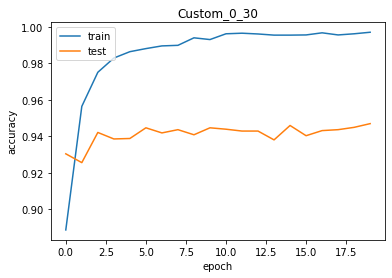

In [36]:
# Train/Test Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom_0_30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-.5, caption)
plt.show()

In [27]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)

inputs = keras.Input(shape=(213, 160, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
modelDataAug = keras.Model(inputs, outputs)
modelDataAug.compile(loss="SparseCategoricalCrossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [28]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

In [31]:
history = modelDataAug.fit(
train_dataset,
epochs=20,
validation_data=val_dataset,
callbacks=callbacks)

Epoch 1/20
296/296 [==============================] - 17s 56ms/step - loss: 2.6421 - accuracy: 0.9632 - val_loss: 9.5238 - val_accuracy: 0.9429
Epoch 2/20
296/296 [==============================] - 17s 57ms/step - loss: 3.3776 - accuracy: 0.9628 - val_loss: 9.1248 - val_accuracy: 0.9429
Epoch 3/20
296/296 [==============================] - 17s 56ms/step - loss: 3.4726 - accuracy: 0.9596 - val_loss: 8.6824 - val_accuracy: 0.9468
Epoch 4/20
296/296 [==============================] - 17s 56ms/step - loss: 3.1350 - accuracy: 0.9609 - val_loss: 9.1253 - val_accuracy: 0.9473
Epoch 5/20
296/296 [==============================] - 17s 57ms/step - loss: 3.6487 - accuracy: 0.9578 - val_loss: 9.0249 - val_accuracy: 0.9496
Epoch 6/20
296/296 [==============================] - 17s 56ms/step - loss: 3.4707 - accuracy: 0.9618 - val_loss: 8.9711 - val_accuracy: 0.9516
Epoch 7/20
296/296 [==============================] - 17s 57ms/step - loss: 3.0532 - accuracy: 0.9658 - val_loss: 8.6248 - val_accuracy:

NameError: name 'caption' is not defined

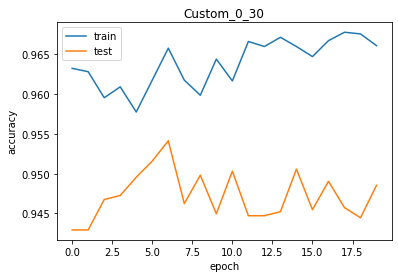

In [32]:
# Train/Test Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom_0_30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-.5, caption)
plt.show()

In [1]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    if (max(img[0][0]) > 1):
        # Convert to float & normalize
        img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    if (max(img[0][0]) > 1):
        # Convert to float & normalize
        img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img
